In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import Drangle

In [2]:
from Drangle import mch_95,mch_05,mch_15

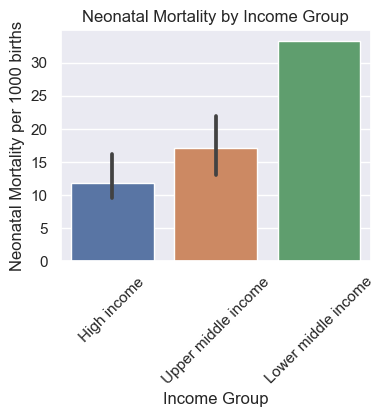

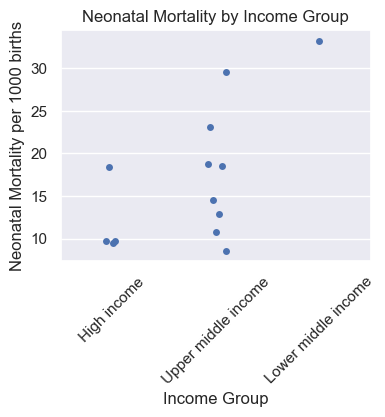

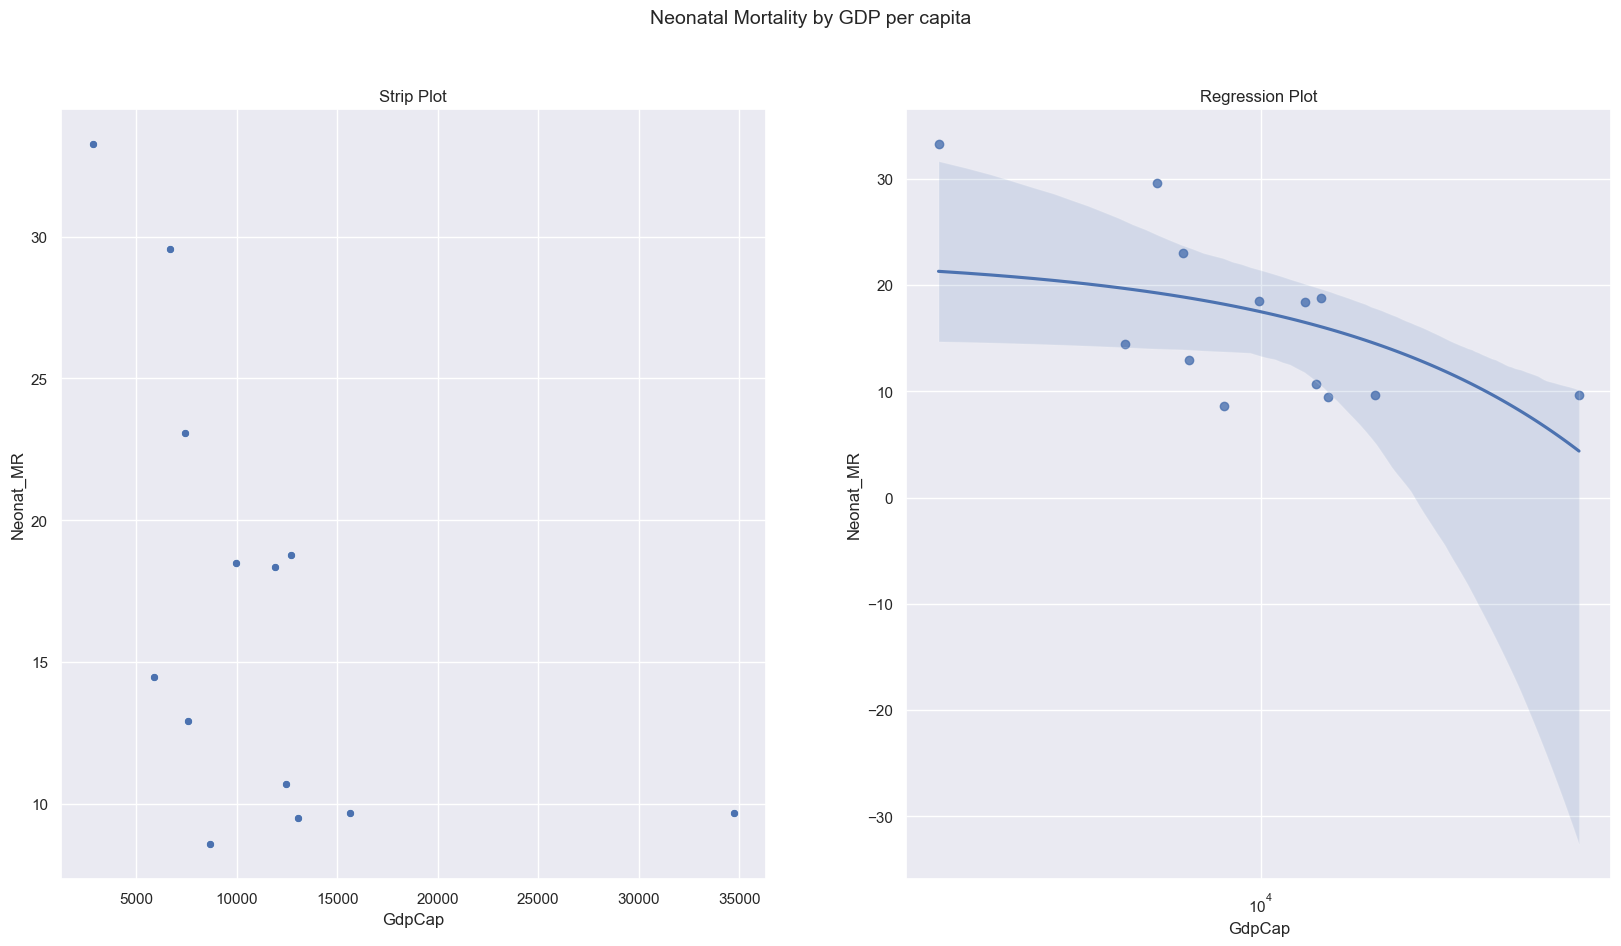

In [38]:
#Investigating GDP impact 

def plot_neonatal_mortality(data, x_variable):
    # Create bar plot and strip plot for IncomeGroup
    if x_variable == 'IncomeGroup':
        plt.figure(figsize=(4, 3))
        sns.barplot(x="IncomeGroup", y="Neonat_MR", data=data)
        plt.xlabel("Income Group")
        plt.ylabel("Neonatal Mortality per 1000 births")
        plt.title("Neonatal Mortality by Income Group")
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(4, 3))
        sns.stripplot(x="IncomeGroup", y="Neonat_MR", data=data)
        plt.xlabel("Income Group")
        plt.ylabel("Neonatal Mortality per 1000 births")
        plt.title("Neonatal Mortality by Income Group")
        plt.xticks(rotation=45)
        plt.show()
        
    # Create scatter plot and regression plot for GdpCap
    elif x_variable == 'GdpCap':
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
        sns.scatterplot(y="Neonat_MR", x="GdpCap", data=data, ax=axes[0])
        sns.regplot(y="Neonat_MR", x="GdpCap", data=data, ax=axes[1])
        axes[1].set_xscale('log')
        axes[0].set_title("Strip Plot")
        axes[1].set_title("Regression Plot")
        fig.suptitle("Neonatal Mortality by GDP per capita", fontsize=14)
        plt.show()
        
# Example usage for IncomeGroup
plot_neonatal_mortality(mch_95, 'IncomeGroup')

# Example usage for GdpCap
plot_neonatal_mortality(mch_95, 'GdpCap')



In [4]:
#Investigating Policy 
def add_bool_pol_column(df):
    # Select columns with boolean dtype
    bool_cols = df.select_dtypes(include=bool)

    # Calculate total count of True values across boolean columns for each row
    total_count = bool_cols.sum(axis=1)

    # Add new column to original dataframe with the total count
    df['PolicyCount'] = total_count

    return df

#Creating tables for analysis with Policy Count 
NeoMR95 = add_bool_pol_column(mch_95)

def extract_4_cols(df, col1, col2, col3, col4):
    return df[[col1, col2, col3, col4]]
 
Neo95 = extract_4_cols(NeoMR95,"Country","GdpCap","Neonat_MR","PolicyCount")

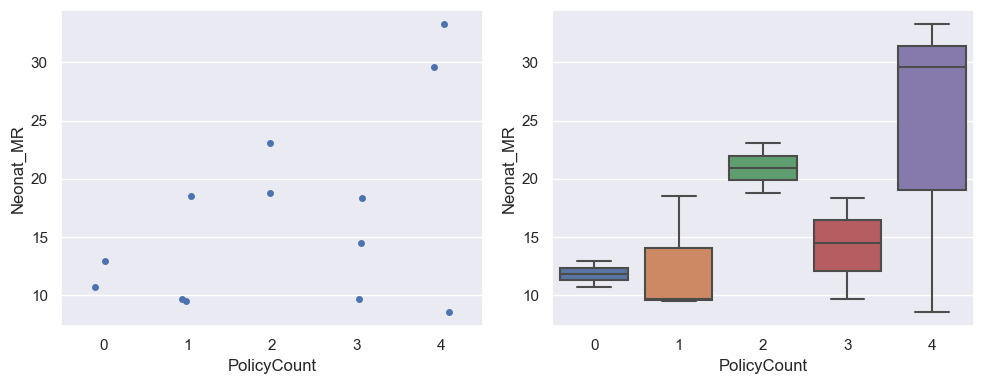

In [31]:
def plot_strip_box_subplots(df, y_vars):
    # Check if there is more than one y-variable
    if len(y_vars) > 1:
        # Set the number of rows and columns for the subplots
        n_rows = len(y_vars)
        n_cols = 2
    else:
        n_rows = 1
        n_cols = 2
    
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
    
    # Loop through the y_vars and create the strip and box plots
    for i, y_var in enumerate(y_vars):
        if len(y_vars) > 1:
            strip_ax = axes[i][0]
            box_ax = axes[i][1]
        else:
            strip_ax = axes[0]
            box_ax = axes[1]
        
        # Strip plot
        sns.stripplot(x='PolicyCount', y=y_var, data=df, ax=strip_ax)
        strip_ax.set_xlabel('PolicyCount')
        strip_ax.set_ylabel(y_var)
        
        # Box plot
        sns.boxplot(x='PolicyCount', y=y_var, data=df, ax=box_ax)
        box_ax.set_xlabel('PolicyCount')
        box_ax.set_ylabel(y_var)
    
    # Adjust the spacing between the subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
# Call the function
plot_strip_box_subplots(Neo95,["Neonat_MR"])

Text(0.5, 0.98, 'Relationship between Log GDP per Capita and Health Indicator')

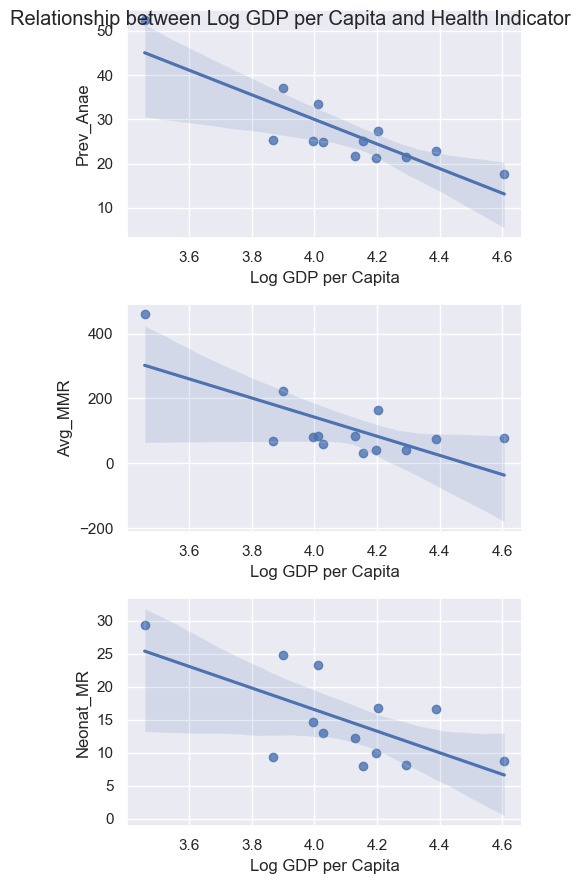

In [24]:
def gdp_subplots(df, y_vars, plot_type='scatter'):
    # Set the log scale for GDP per Capita
    df['log_gdp'] = df["GdpCap"].apply(lambda x: np.log10(x))
    
    # Set the number of rows and columns for the subplots
    n_rows = len(y_vars)
    n_cols = 1
    
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5, 3 * n_rows))
    
    # Loop through the y_vars and create the scatter plots and line plots
    for i, y_var in enumerate(y_vars):
        if plot_type == 'scatter':
            # Scatter plot
            sns.scatterplot(x='log_gdp', y=y_var, data=df, ax=axes[i])
        elif plot_type == 'line':
            # Line plot
            sns.lineplot(x='log_gdp', y=y_var, data=df, ax=axes[i])
        elif plot_type == 'reg':
            # Regression plot
            sns.regplot(x='log_gdp', y=y_var, data=df, ax=axes[i])
        else:
            raise ValueError("Invalid plot type. Please use 'scatter', 'line', or 'reg'.")
        
        # Set axis labels
        axes[i].set_xlabel('Log GDP per Capita')
        axes[i].set_ylabel(y_var)
        
    # Adjust the spacing between the subplots
    plt.tight_layout()
    
    # Return the subplots
    return fig, axes
    
    # Show the plot
    plt.show()
    
gdp_subplots(mch_05,['Prev_Anae','Avg_MMR',"Neonat_MR"],plot_type="reg")
# Set the title of the plot
plt.suptitle('Relationship between Log GDP per Capita and Health Indicator')

Text(0.5, 0.98, 'Relationship between Log GDP per Capita and Health Indicator')

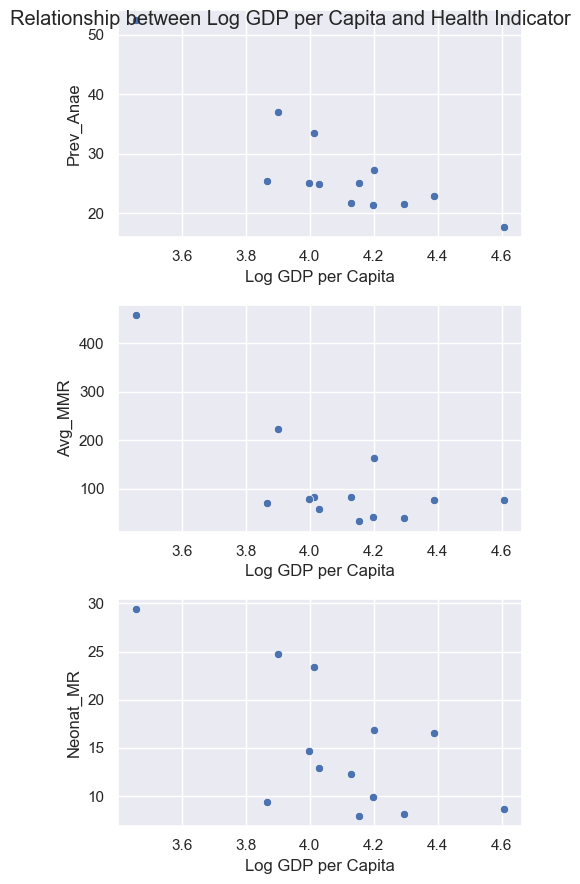

In [59]:
gdp_subplots(mch_05,['Prev_Anae','Avg_MMR',"Neonat_MR"],plot_type="scatter")
# Set the title of the plot
plt.suptitle('Relationship between Log GDP per Capita and Health Indicator')

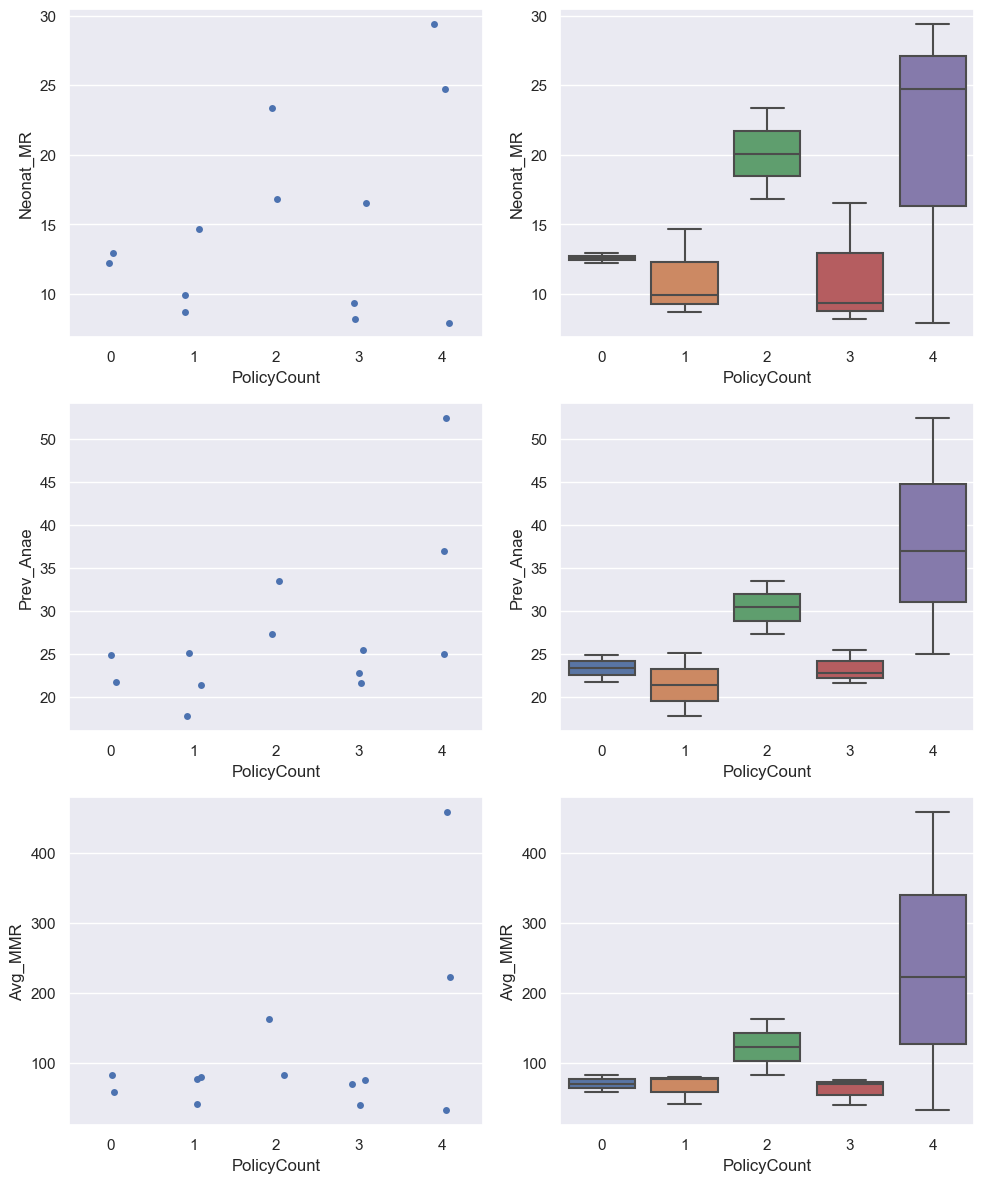

In [32]:
#Creating tables for analysis with Policy Count 
def extract_6_cols(df, col1, col2, col3,col4,col5,col6):
    return df[[col1, col2, col3,col4,col5,col6]]

Mch_05ind = add_bool_pol_column(mch_05)
Mch_05ind = extract_6_cols(Mch_05ind, "Country", 'Prev_Anae', 'Avg_MMR', 'Neonat_MR',"PolicyCount","IncomeGroup")

#Influnce of Policy 
plot_strip_box_subplots(Mch_05ind,["Neonat_MR",'Prev_Anae', 'Avg_MMR'])

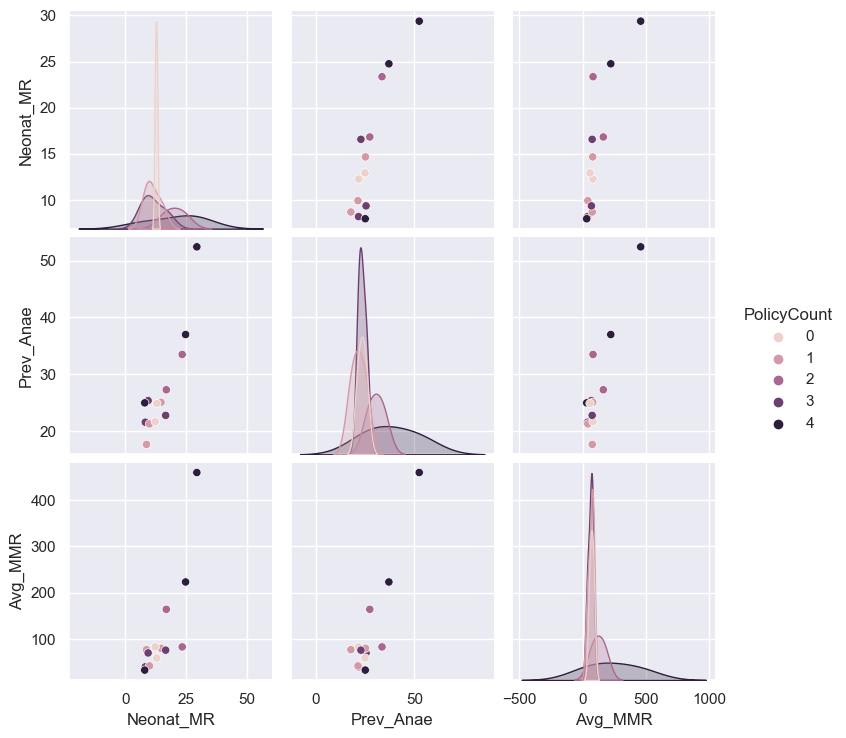

In [55]:
#Creating function to analyse various variables in a pairplot

def plot_pairplot(df, x_vars, hue=None):
    # Select the columns to use as x variables
    x_vars = x_vars[:3] # Only select the first three variables
    
    # Create the pairplot
    sns.pairplot(data=df, vars=x_vars, hue=hue, kind='scatter')
    
    # Show the plot
    plt.show()
plot_pairplot(mch_05, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue="PolicyCount")


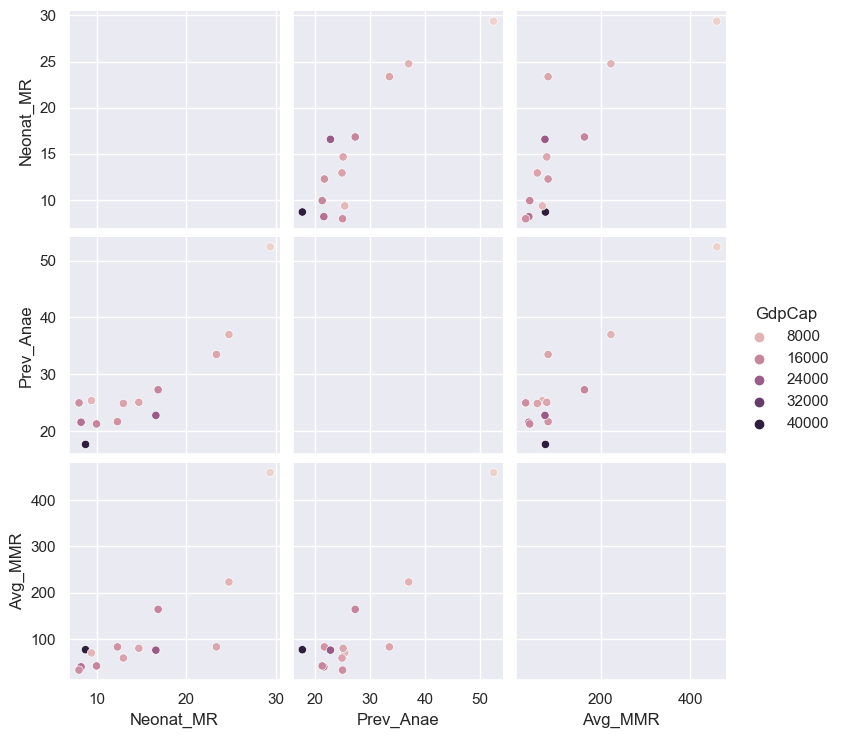

In [61]:
plot_pairplot(mch_05, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='GdpCap')

## Plots for 2015

Text(0.5, 0.98, 'Relationship between Log GDP per Capita and Health Indicator')

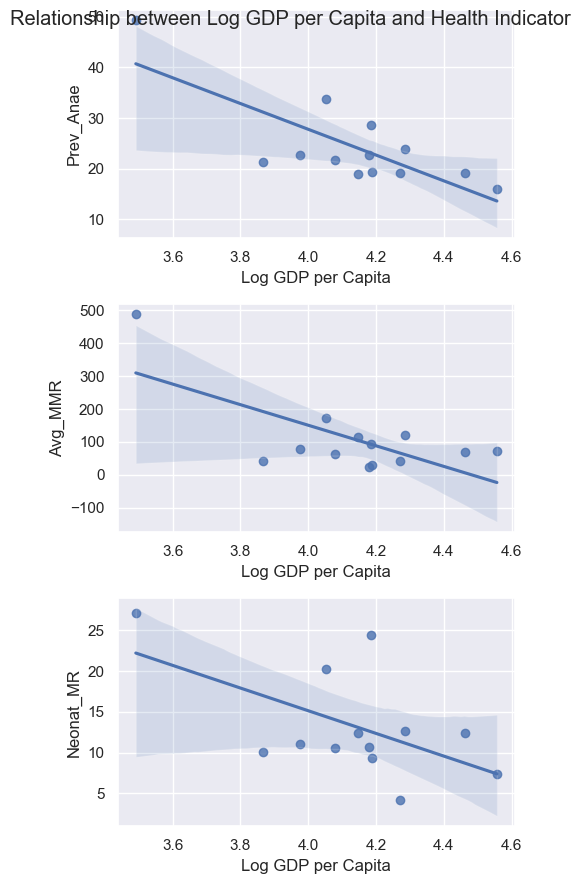

In [60]:
# Influence of GDP on indicators 
gdp_subplots(mch_15,['Prev_Anae','Avg_MMR',"Neonat_MR"],plot_type="reg")
# Set the title of the plot
plt.suptitle('Relationship between Log GDP per Capita and Health Indicator')

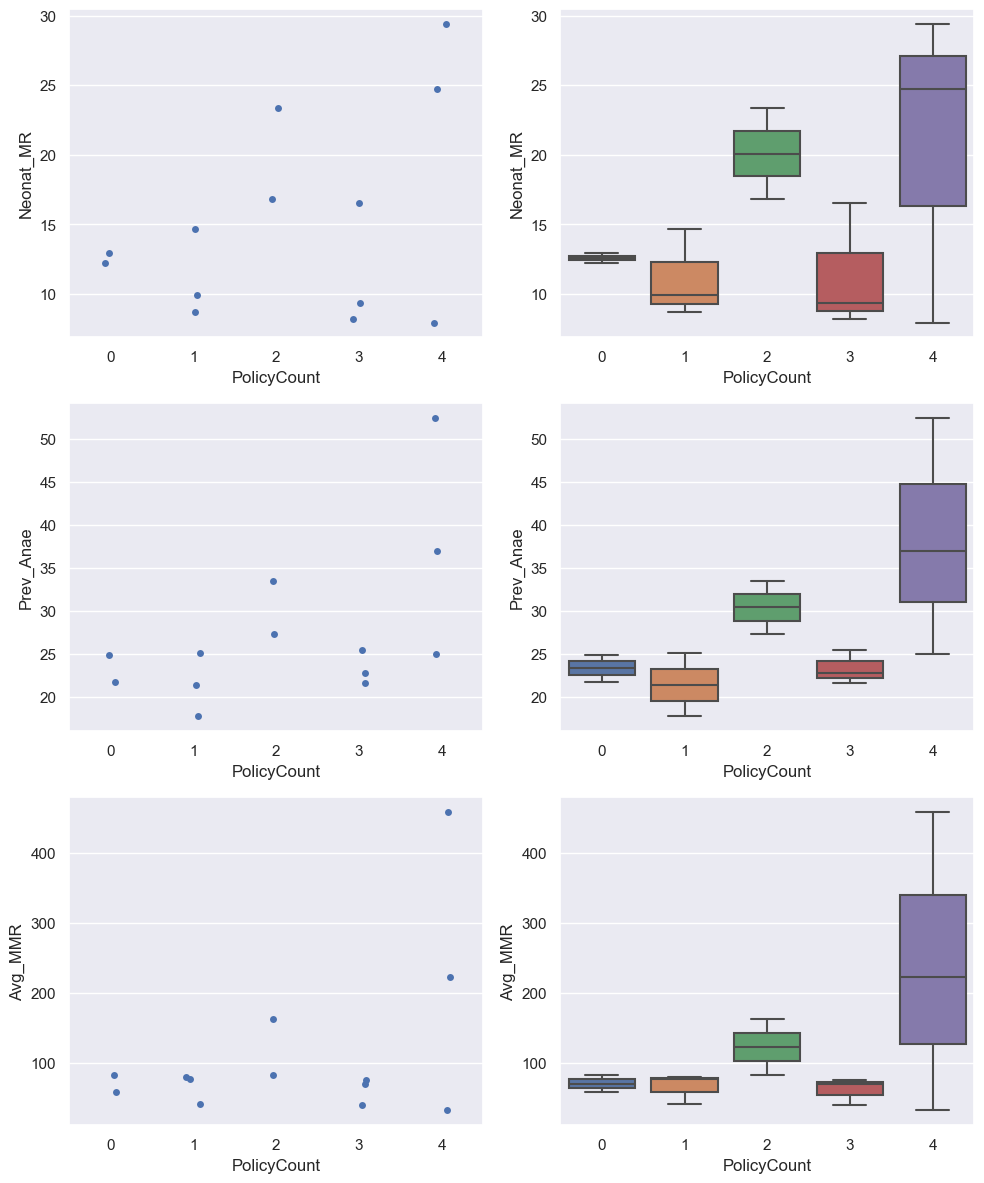

In [62]:
Mch_15ind = add_bool_pol_column(mch_15)
Mch_15ind = extract_6_cols(Mch_05ind, "Country", 'Prev_Anae', 'Avg_MMR', 'Neonat_MR',"PolicyCount","IncomeGroup")

#Influnce of Policy 
plot_strip_box_subplots(Mch_15ind,["Neonat_MR",'Prev_Anae', 'Avg_MMR'])

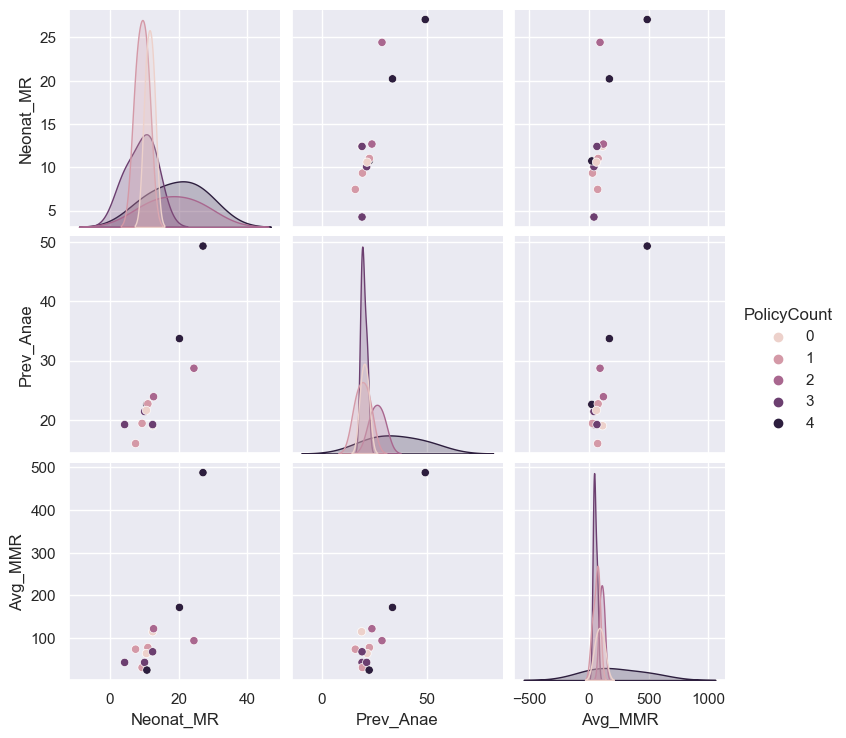

In [63]:
#Creating function to analyse various variables in a pairplot
plot_pairplot(mch_15, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='PolicyCount')

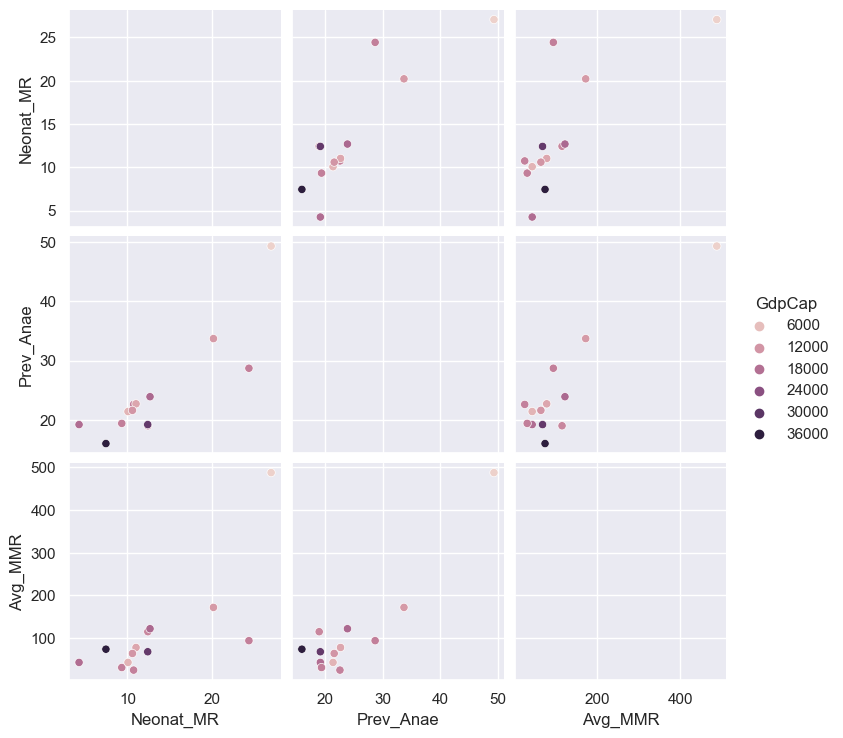

In [64]:
plot_pairplot(mch_15, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='GdpCap')